In [ ]:
#default_exp core
#default_cls_lvl 3

In [ ]:
#export
from fastai2.torch_basics import *
from fastai2.data.all import *

In [ ]:
#export
import pandas as pd
from fastcore.all import *
from scipy.io import arff

# Core

> Basic timeseries opening/processing funcs.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
def no_emp_dim(x):
    if len(x.shape)==1 :
        x = x[None,:]
    return np.vstack(x)

In [ ]:
#export
def maybe_unsqueeze(x):
    return tensor(x).unsqueeze(0) if len(x.shape)==1 else tensor(x)

In [ ]:
#export
def show_array(array, ax=None, figsize=None, title=None, ctx=None, tx=None, **kwargs):
    "Show an array on `ax`."
    # Handle pytorch axis order
    if hasattrs(array, ('data','cpu','permute')):
        array = array.data.cpu()
    elif not isinstance(array,np.ndarray):
        array=array(array)
    arrays = no_emp_dim(array)
    ax = ifnone(ax,ctx)
    if figsize is None: figsize = (5,5)
    if ax is None: _,ax = plt.subplots(figsize=figsize)
    tx = ifnone(tx,np.arange(arrays[0].shape[0]))
    label = kwargs.pop('label', 'x')
    for a, c in zip(arrays, ['b', 'c', 'm', 'y', 'k',]):
        ax.plot(tx, a, '-*'+c,label=label, **kwargs)
    if title is not None: ax.set_title(title)
    ax.legend()
    return ax

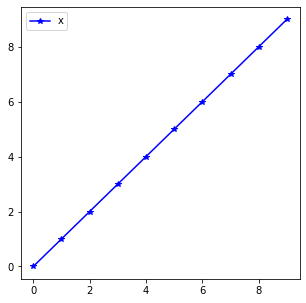

In [ ]:
show_array(np.arange(10))

In [ ]:
# export
class TSeries(TensorBase):
    "Basic Timeseries class"
#     def __init__(self, x):
#         super().__init__(maybe_unsqueeze(x))
        
    @classmethod
    def create(cls, x): 
        return cls(maybe_unsqueeze(x))
    
    @property
    def channels(self): return self.shape[0]
    
    @property
    def len(self): return self.shape[-1]
    
    def __repr__(self):
        return f'TSeries(ch={self.channels}, len={self.len})'
    
    def show(self, ctx=None, **kwargs):
        return show_array(self, ctx=ctx, **kwargs)

In [ ]:
a = np.arange(10)+np.random.randn(10)

In [ ]:
ts2 = TSeries(maybe_unsqueeze(a))

In [ ]:
ts2.data

tensor([[-1.1788,  0.6934,  3.4595,  3.8474,  4.6957,  5.1585,  5.1044,  8.1481,
          9.2512,  7.4253]])

In [ ]:
ts2

TSeries(ch=1, len=10)

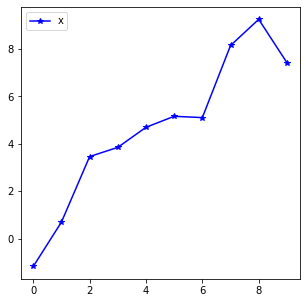

In [ ]:
ts2.show()

## UCR
> The 2018 UCR 128-timeseries dataset

In [ ]:
#export
URLs.UCR = 'http://www.timeseriesclassification.com/Downloads/Archives/Univariate2018_arff.zip'

In [ ]:
URLs.UCR

'http://www.timeseriesclassification.com/Downloads/Archives/Univariate2018_arff.zip'

In [ ]:
#export
def get_ucr():
    "zipped file has different name as .zip"
    ucr_path_2018 = untar_data(URLs.UCR)
    return ucr_path_2018.parent/ucr_path_2018.name.replace('2018', '')

In [ ]:
ucr_path = get_ucr()

In [ ]:
ucr_path.ls()

(#135) [Path('/home/tc256760/.fastai/data/Univariate_arff/PowerCons'),Path('/home/tc256760/.fastai/data/Univariate_arff/PhalangesOutlinesCorrect'),Path('/home/tc256760/.fastai/data/Univariate_arff/Herring'),Path('/home/tc256760/.fastai/data/Univariate_arff/ElectricDevices'),Path('/home/tc256760/.fastai/data/Univariate_arff/CBF'),Path('/home/tc256760/.fastai/data/Univariate_arff/Plane'),Path('/home/tc256760/.fastai/data/Univariate_arff/DataSummaryExpanded_v03.xlsx'),Path('/home/tc256760/.fastai/data/Univariate_arff/MiddlePhalanxTW'),Path('/home/tc256760/.fastai/data/Univariate_arff/ECG5000'),Path('/home/tc256760/.fastai/data/Univariate_arff/CricketZ')...]

In [ ]:
adiac_path = ucr_path/'Adiac'

In [ ]:
adiac_path.ls()

(#5) [Path('/home/tc256760/.fastai/data/Univariate_arff/Adiac/Adiac.txt'),Path('/home/tc256760/.fastai/data/Univariate_arff/Adiac/Adiac_TEST.arff'),Path('/home/tc256760/.fastai/data/Univariate_arff/Adiac/Adiac_TEST.txt'),Path('/home/tc256760/.fastai/data/Univariate_arff/Adiac/Adiac_TRAIN.txt'),Path('/home/tc256760/.fastai/data/Univariate_arff/Adiac/Adiac_TRAIN.arff')]

In [ ]:
# "this functions are based on https://github.com/mb4310/Time-Series"
#export
def load_df_ucr(path, task):
    "Loads arff files from UCR"
    try:
        print(f'Loading files from: {path}/{task}')
        dfs = []
        for file in ['TRAIN', 'TEST']:
            filename = f'{task}/{task}_{file}.arff'
            data = arff.loadarff(str(path/filename))
            dfs.append(pd.DataFrame(data[0]))
        return dfs
    except:
        print('Error loading files')

In [ ]:
df_train, df_test = load_df_ucr(ucr_path, 'Adiac')

Loading files from: /home/tc256760/.fastai/data/Univariate_arff/Adiac


In [ ]:
df_train.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att168,att169,att170,att171,att172,att173,att174,att175,att176,target
0,1.598007,1.599439,1.570529,1.550474,1.507371,1.434341,1.368986,1.305294,1.210305,1.116653,...,1.120906,1.217175,1.312530,1.402920,1.481043,1.521012,1.564154,1.570855,1.592890,b'22'
1,1.701146,1.670645,1.618884,1.546805,1.475469,1.391209,1.305882,1.237313,1.153414,1.069690,...,1.012163,1.097360,1.182578,1.266291,1.350571,1.435160,1.519737,1.602518,1.670190,b'28'
2,1.722342,1.695329,1.656946,1.606312,1.511824,1.414148,1.313688,1.213234,1.112978,1.015081,...,1.065598,1.164750,1.263924,1.364303,1.463511,1.547307,1.641809,1.694973,1.708488,b'21'
3,1.726263,1.659836,1.573108,1.496264,1.409070,1.332443,1.245742,1.158882,1.073361,0.987165,...,1.114440,1.199608,1.275380,1.362258,1.448567,1.535131,1.622158,1.707838,1.739027,b'15'
4,1.778976,1.761203,1.703084,1.610572,1.492088,1.368654,1.244761,1.120900,1.010762,0.900168,...,1.165685,1.285657,1.408878,1.507983,1.623643,1.713606,1.766389,1.783633,1.758625,b'2'


## Datasets

In [ ]:
#export
def get_x(row):
    return row.values[:-1].astype('float32')
def get_y(row):
    return int(row.values[-1])

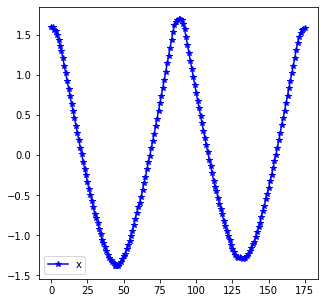

In [ ]:
TSeries(get_x(df_train.iloc[0])).show()

In [ ]:
train_ds = Datasets(df_train, tfms=[[get_x, TSeries.create], [get_y, Categorize()]])
test_ds = Datasets(df_test, tfms=[[get_x, TSeries.create], [get_y, Categorize()]])

In [ ]:
train_ds

(#390) [(TSeries(ch=1, len=176), TensorCategory(21)),(TSeries(ch=1, len=176), TensorCategory(27)),(TSeries(ch=1, len=176), TensorCategory(20)),(TSeries(ch=1, len=176), TensorCategory(14)),(TSeries(ch=1, len=176), TensorCategory(1)),(TSeries(ch=1, len=176), TensorCategory(17)),(TSeries(ch=1, len=176), TensorCategory(20)),(TSeries(ch=1, len=176), TensorCategory(35)),(TSeries(ch=1, len=176), TensorCategory(10)),(TSeries(ch=1, len=176), TensorCategory(20))...]

In [ ]:
test_ds

(#391) [(TSeries(ch=1, len=176), TensorCategory(15)),(TSeries(ch=1, len=176), TensorCategory(35)),(TSeries(ch=1, len=176), TensorCategory(33)),(TSeries(ch=1, len=176), TensorCategory(21)),(TSeries(ch=1, len=176), TensorCategory(15)),(TSeries(ch=1, len=176), TensorCategory(30)),(TSeries(ch=1, len=176), TensorCategory(23)),(TSeries(ch=1, len=176), TensorCategory(1)),(TSeries(ch=1, len=176), TensorCategory(29)),(TSeries(ch=1, len=176), TensorCategory(13))...]

In [ ]:
train_dl = TfmdDL(train_ds, bs=2)

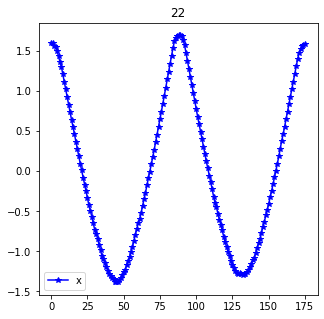

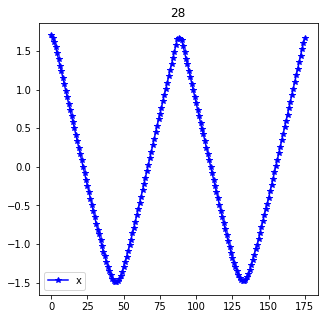

In [ ]:
train_dl.show_batch()

In [ ]:
train_dl = DataLoader(train_ds, bs=32)
test_dl = DataLoader(test_ds, bs=32)

In [ ]:
dls = DataLoaders(train_dl, test_dl)

## DataBlock

In [ ]:
def TSBlock(cls=TSeries): return TransformBlock(cls)

In [ ]:
dblock = DataBlock(blocks=(TSBlock, CategoryBlock),
                   get_x=get_x,
                   get_y=get_y,
                   splitter=RandomSplitter(0.2))

In [ ]:
# dblock.dataloaders(df_train)

# Export -

In [ ]:
# hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 02_models.inception.ipynb.
Converted 99_index.ipynb.
Converted index.ipynb.
